In [180]:
#Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
#NBA Statistics
#Read in CSVs
nba_revenue_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/nba_revenue.csv"
player_salary_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/player_salary.csv"
salary_cap_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/salary_cap.csv"
tv_viewership_csv = "/Users/samuelgiddins/Desktop/project_one/csv_files/tv_viewership.csv"

In [182]:
#Create DataFrames
nba_revenue_df = pd.read_csv(nba_revenue_csv)
player_salary_df = pd.read_csv(player_salary_csv)
player_salaries_df = player_salary_df[['Year','Team','Player','Salary']]
salary_cap_df = pd.read_csv(salary_cap_csv)
tv_viewership_df = pd.read_csv(tv_viewership_csv)

In [183]:
avg_salary_df = player_salaries_df[["Salary", "Year"]].groupby(["Year"]).mean()

In [184]:
nba_revenue_df.head()

,Year,NBA Revenue (Billions of $)
0,2002,2.66
1,2003,2.72
2,2004,2.93
3,2005,3.19
4,2006,3.37


In [185]:
avg_salary_df.head()

,Salary
Year,
1991,8.316232
1992,9.525309
1993,10.566158
1994,12.698832
1995,13.891740


In [186]:
salary_cap_df.head()

,Year,Salary Cap (2015 USD)
0,1984,7.93
1,1985,9.15
2,1986,10.32
3,1987,12.35
4,1988,13.83


In [187]:
tv_viewership_df.head()

,Year,Viewership (millions)
0,2002,15.68
1,2003,9.86
2,2004,17.94
3,2005,12.54
4,2006,12.97


In [188]:
nba_merge1 =  pd.merge(nba_revenue_df, avg_salary_df, how="left", on="Year")
nba_merge2 = pd.merge(nba_merge1, salary_cap_df, how="left", on="Year")
full_nba_df = pd.merge(nba_merge2, tv_viewership_df, how="left", on="Year")

In [189]:
full_nba_df.rename(columns = {"Salary": "Average Salary (/$100k)", "Salary Cap (2015 USD)": "Salary Cap (Millions USD)", "Viewership (millions)": "TV Viewership (Millions)"})


,Year,NBA Revenue (Billions of $),Average Salary (/$100k),Salary Cap (Millions USD),TV Viewership (Millions)
0,2002,2.66,33.956645,51.89,15.68
1,2003,2.72,35.987371,55.02,9.86
2,2004,2.93,36.283015,53.24,17.94
3,2005,3.19,36.721781,58.20,12.54
4,2006,3.37,38.178551,60.74,12.97
5,2007,3.57,37.295750,61.24,9.29
6,2008,3.77,42.120020,64.83,14.94
7,2009,3.79,45.634736,62.72,14.35
8,2010,3.81,44.580485,61.16,18.14
9,2011,3.96,43.012293,59.93,17.34


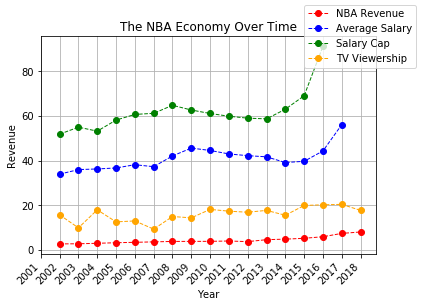

In [193]:
#Create the Scatter plot
metric_list = ['NBA Revenue', 'Average Salary', 'Salary Cap', 'TV Viewership']
plt.plot(full_nba_df["Year"], full_nba_df["NBA Revenue (Billions of $)"], color="r", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Salary"], color="b", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Salary Cap (2015 USD)"], color="g", marker="o", linestyle="dashed", linewidth=1)
plt.plot(full_nba_df["Year"], full_nba_df["Viewership (millions)"], color="orange", marker="o", linestyle="dashed", linewidth=1)
plt.grid(True)
plt.title("The NBA Economy Over Time")
plt.xlabel("Year") 
plt.xticks(final_sports_df["Year"], rotation=45, ha="right")
plt.ylabel("Revenue")
plt.figlegend(metric_list)
plt.savefig("nba_economy.png")

plt.show()

In [47]:
#Comparison to other major sports
mlb_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/mlb_revenue.csv")
nfl_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/nfl_revenue.csv")
nhl_csv = pd.read_csv("/Users/samuelgiddins/Desktop/project_one/csv_files/nhl_revenue.csv")

In [48]:
mlb_df = pd.DataFrame(mlb_csv)
mlb_df.rename(columns = {"Revenue (Billions USD)": "MLB Revenue (Billions USD)"})

nfl_df = pd.DataFrame(nfl_csv)
nfl_df.rename(columns = {"Revenue (Billions USD)": "NFL Revenue (Billions USD)"})

nhl_df = pd.DataFrame(nhl_csv)
nhl_df.rename(columns = {"Revenue (Billions USD)": "NHL Revenue (Billions USD)"})

mlb_df.head()

,Year,Revenue (Billions USD)
0,2001,3.58
1,2002,3.65
2,2003,3.88
3,2004,4.27
4,2005,4.73


In [49]:
nfl_df.head()

,Year,Revenue (Billions USD)
0,2001,4.28
1,2002,4.94
2,2003,5.33
3,2004,6.03
4,2005,6.16


In [50]:
nhl_df.head()

,Year,Revenue (Billions USD)
0,2005,2.27
1,2006,2.44
2,2007,2.75
3,2008,2.82
4,2009,2.93


In [51]:
nba_revenue_df.head()

,Year,NBA Revenue (Billions of $)
0,2002,2.66
1,2003,2.72
2,2004,2.93
3,2005,3.19
4,2006,3.37


In [68]:
merge1 = pd.merge(mlb_df, nfl_df, how="left", on="Year")

In [69]:
merge2 = pd.merge(merge1, nhl_df, how="left", on="Year")

In [70]:
sports_df = pd.merge(merge2, nba_revenue_df, how="left", on="Year")

In [71]:
sports_df.rename(columns= {"Revenue (Billions USD)_x": "MLB Revenue (Billions USD)", "Revenue (Billions USD)_y": "NFL Revenue (Billions USD)", "Revenue (Billions USD)": "NHL Revenue (Billions USD)", "NBA Revenue (Billions of $)": "NBA Revenue (Billions USD)"})

,Year,MLB Revenue (Billions USD),NFL Revenue (Billions USD),NHL Revenue (Billions USD),NBA Revenue (Billions USD)
0,2001,3.58,4.28,NaN,NaN
1,2002,3.65,4.94,NaN,2.66
2,2003,3.88,5.33,NaN,2.72
3,2004,4.27,6.03,NaN,2.93
4,2005,4.73,6.16,2.27,3.19
5,2006,5.11,6.54,2.44,3.37
6,2007,5.48,7.09,2.75,3.57
7,2008,5.82,7.57,2.82,3.77
8,2009,5.90,8.02,2.93,3.79
9,2010,6.14,8.35,3.09,3.81


In [73]:
final_sports_df = sports_df.reset_index()

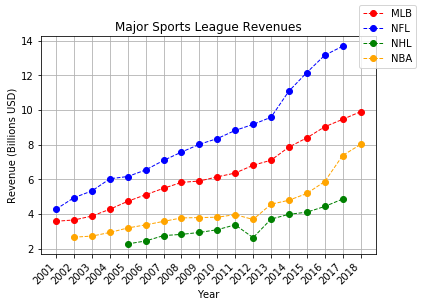

In [194]:
#Create the Scatter plot
sport_list = ['MLB', 'NFL', 'NHL', 'NBA']
plt.plot(final_sports_df["Year"], final_sports_df["Revenue (Billions USD)_x"], color="r", marker="o", linestyle="dashed", linewidth=1)
plt.plot(final_sports_df["Year"], final_sports_df["Revenue (Billions USD)_y"], color="b", marker="o", linestyle="dashed", linewidth=1)
plt.plot(final_sports_df["Year"],final_sports_df["Revenue (Billions USD)"], color="g", marker="o", linestyle="dashed", linewidth=1)
plt.plot(final_sports_df["Year"],final_sports_df["NBA Revenue (Billions of $)"], color="orange", marker="o", linestyle="dashed", linewidth=1)
plt.grid(True)
plt.title("Major Sports League Revenues")
plt.xlabel("Year") 
plt.xticks(final_sports_df["Year"], rotation=45, ha="right")
plt.ylabel("Revenue (Billions USD)")
plt.figlegend(sport_list)

plt.savefig("major_sports_economies.png")
plt.show()